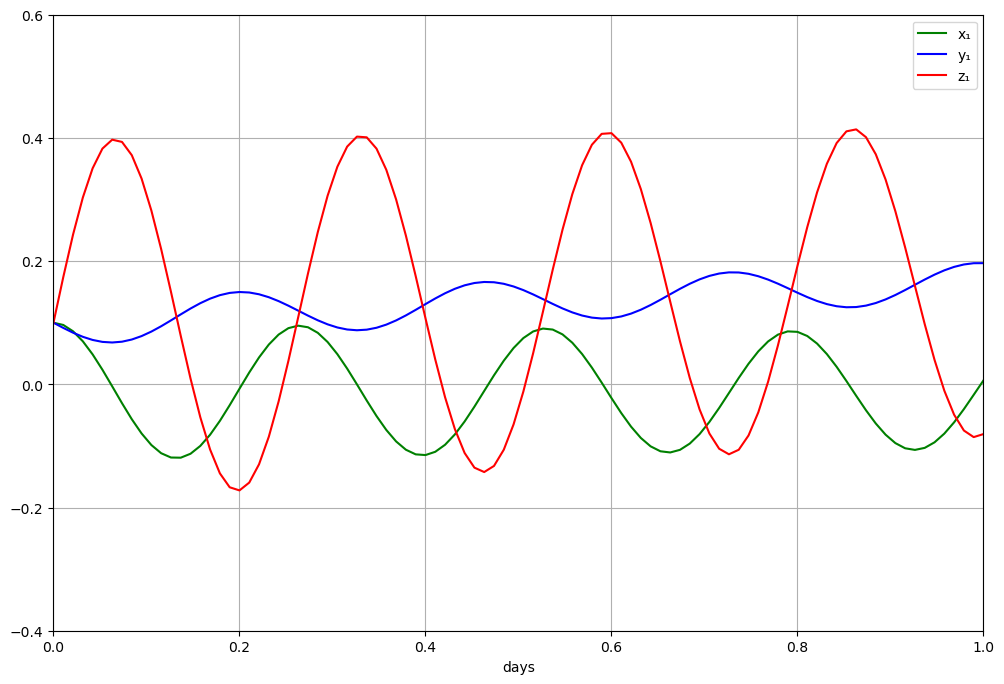

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

vetor_a = [1, 1, 3]
vetor_b = [
    1/2 * (vetor_a[0] - vetor_a[1] - vetor_a[2]),
    1/2 * (vetor_a[1] - vetor_a[2] - vetor_a[0]),
    1/2 * (vetor_a[2] - vetor_a[0] - vetor_a[1])
]
c = math.sqrt(3/4)

f_inv = 10800
vetor_h = [-1, 0, 0]
vetor_f = [0.1, 0, 0]
g_0 = 8
kappa_0 = 1/48
nu_0 = kappa_0

def derivatives(x, y, z):
    dx = np.zeros(3)
    dy = np.zeros(3)
    dz = np.zeros(3)

    for i in range(3):
        j = (i + 1) % 3
        k = (i + 2) % 3
        
        dx[i] = (vetor_a[i]*vetor_b[i]*x[j]*x[k] - 
                c*(vetor_a[i] - vetor_a[k])*y[j]*y[k] - 
                2*c*y[i]*y[k] - 
                nu_0*vetor_a[i]*x[i] +
                vetor_a[i]*y[i] - 
                vetor_a[i]*z[i])
        
        dy[i] = (-vetor_a[k]*vetor_b[k]*y[j]*y[k] - 
                vetor_a[j]*vetor_b[j]*y[j]*y[k] +
                c*(vetor_a[k] - vetor_a[j])*y[j]*y[k] - 
                vetor_a[i]*x[i] - 
                nu_0*vetor_a[i]*y[i])
        
        dz[i] = (-vetor_b[k]*y[j]*(z[k] - vetor_h[k]) -
                vetor_b[j]*(z[j] - vetor_h[j])*y[k] +
                c*y[j]*(z[k] - vetor_h[k]) -
                c*(z[j] - vetor_h[j])*y[k] +
                g_0*x[i] - 
                kappa_0*vetor_a[i]*z[i] + 
                vetor_f[i])
    
    return dx, dy, dz

def runge_kutta(dias):
    t_final = dias * 8
    dt_tau = 1/12
    n_steps = int(t_final / dt_tau)

    t = np.linspace(0, t_final, n_steps)
    x = np.zeros((n_steps, 3))
    y = np.zeros((n_steps, 3))
    z = np.zeros((n_steps, 3))

    x[0] = [0.1, 0, 0]
    y[0] = [0.1, 0, 0]
    z[0] = [0.1, 0, 0]

    for i in range(1, n_steps):
        dx1, dy1, dz1 = derivatives(x[i-1], y[i-1], z[i-1])
        k1x = dt_tau * dx1
        k1y = dt_tau * dy1
        k1z = dt_tau * dz1

        dx2, dy2, dz2 = derivatives(x[i-1] + k1x/2, y[i-1] + k1y/2, z[i-1] + k1z/2)
        k2x = dt_tau * dx2
        k2y = dt_tau * dy2
        k2z = dt_tau * dz2

        dx3, dy3, dz3 = derivatives(x[i-1] + k2x/2, y[i-1] + k2y/2, z[i-1] + k2z/2)
        k3x = dt_tau * dx3
        k3y = dt_tau * dy3
        k3z = dt_tau * dz3

        dx4, dy4, dz4 = derivatives(x[i-1] + k3x, y[i-1] + k3y, z[i-1] + k3z)
        k4x = dt_tau * dx4
        k4y = dt_tau * dy4
        k4z = dt_tau * dz4

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x)/6
        y[i] = y[i-1] + (k1y + 2*k2y + 2*k3y + k4y)/6
        z[i] = z[i-1] + (k1z + 2*k2z + 2*k3z + k4z)/6

    t_days = t * 3/24
    return t_days, x, y, z

def plot2d(t, x, y, z, dias):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.plot(t, x[:, 0], '-', linewidth=1.5, label='x₁', color='green')
    ax.plot(t, y[:, 0], '-', linewidth=1.5, label='y₁', color='blue')
    ax.plot(t, z[:, 0], '-', linewidth=1.5, label='z₁', color='red')

    ax.set_xlim(0, dias)
    ax.set_ylim(-0.4, 0.6)
    ax.set_xlabel('days')
    ax.grid(True)
    ax.legend()
    
    return fig, ax

def main():
    dias_simulacao = 1
    t, x, y, z = runge_kutta(dias_simulacao)
    plot2d(t, x, y, z, dias_simulacao)
    plt.show()

if __name__ == '__main__':
    main()

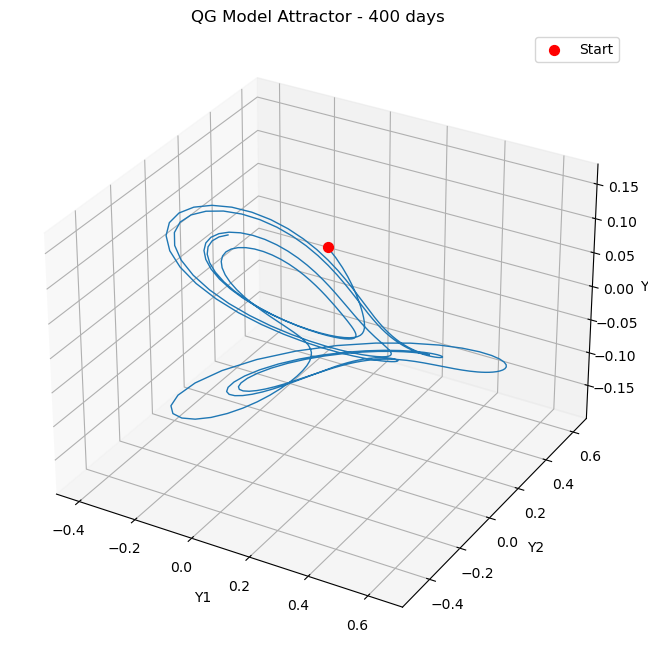

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math

vetor_a = [1, 1, 3]
c = math.sqrt(3/4)
g_0 = 8
vetor_h = [-1, 0, 0]
kappa_0 = 1/48
nu_0 = kappa_0
vetor_f = [0.2, 0, 0]

def qg_model(y):
   dy = np.zeros(3)
   for i in range(3):
       j = (i + 1) % 3
       k = (i + 2) % 3
       dy[i] = (g_0*c*(vetor_a[k] - vetor_a[j])*y[j]*y[k]
               - vetor_a[i]*(vetor_a[i]*g_0*nu_0 + kappa_0)*y[i]
               - c*vetor_h[k]*y[j] + c*vetor_h[j]*y[k] + vetor_f[i]) / (vetor_a[i]*g_0 + 1)
   return dy

def rk4(f, y0, t):
   n = len(t)
   y = np.zeros((n, len(y0)))
   y[0] = y0
   dt = 1
   
   for i in range(n-1):
       k1 = f(y[i])
       k2 = f(y[i] + k1 * dt/2)
       k3 = f(y[i] + k2 * dt/2) 
       k4 = f(y[i] + k3 * dt)
       y[i+1] = y[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
   
   return y

def plot3d(dias, y0):
   t = np.arange(0, dias)
   sol = rk4(qg_model, y0, t)
   
   fig = plt.figure(figsize=(10, 8))
   ax = fig.add_subplot(111, projection='3d')
   
   ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=1)
   ax.scatter(sol[0,0], sol[0,1], sol[0,2], c='r', s=50, label='Start')
   
   ax.set_xlabel('Y1')
   ax.set_ylabel('Y2')
   ax.set_zlabel('Y3')
   ax.set_title(f'QG Model - {dias} dias')
   ax.legend()
   
   plt.show()

def main():
   dias = 400
   y0 = [0.1, 0.1, 0.1]
   plot3d(dias, y0)

if __name__ == "__main__":
   main()

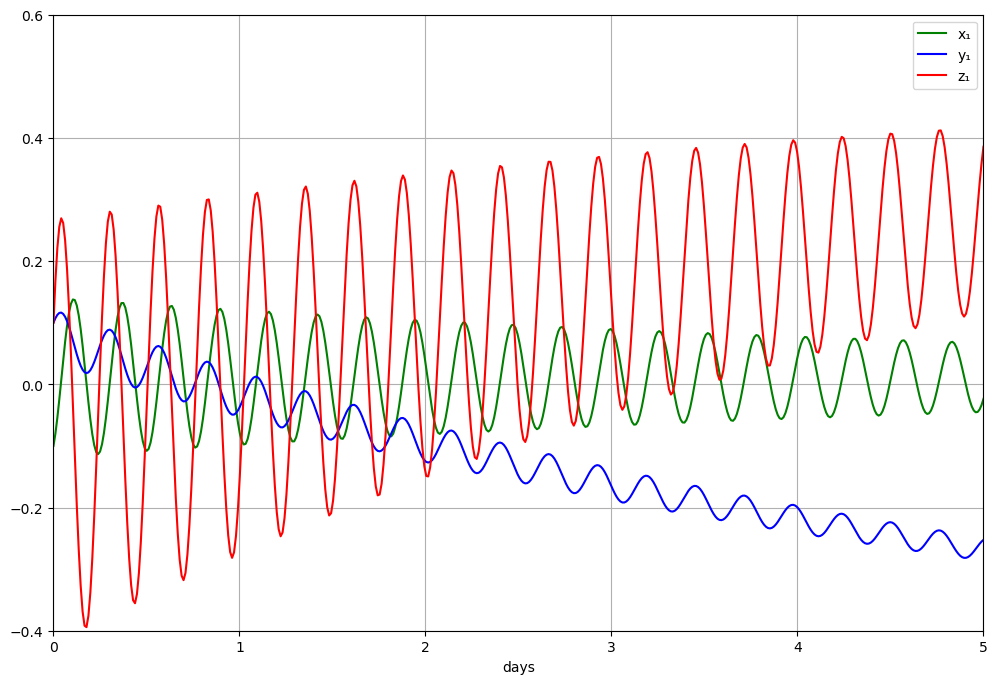

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

vetor_a = [1, 1, 3]
vetor_b = [
    1/2 * (vetor_a[0] - vetor_a[1] - vetor_a[2]),
    1/2 * (vetor_a[1] - vetor_a[2] - vetor_a[0]),
    1/2 * (vetor_a[2] - vetor_a[0] - vetor_a[1])
]
c = math.sqrt(3/4)

f_inv = 10800
vetor_h = [-1, 0, 0]
vetor_f = [0.1, 0, 0]
g_0 = 8
kappa_0 = 1/48
nu_0 = kappa_0

def calculate_uv(x, y):
    u = [
        -vetor_b[1] * x[0] + c * y[0],
        -vetor_b[2] * x[1] + c * y[1],
        -vetor_b[0] * x[2] + c * y[2]
    ]

    v = [
        -vetor_b[2] * x[0] - c * y[0],
        -vetor_b[0] * x[1] - c * y[1],
        -vetor_b[1] * x[2] - c * y[2]
    ]

    return u, v

def derivatives(x, y, z):
    u, v = calculate_uv(x, y)

    dx = [
        u[1]*u[2] + v[1]*v[2] - nu_0*vetor_a[0]*x[0] + y[0] + vetor_a[0]*z[0],
        u[2]*u[0] + v[2]*v[0] - nu_0*vetor_a[1]*x[1] + y[1] + vetor_a[1]*z[1],
        u[0]*u[1] + v[0]*v[1] - nu_0*vetor_a[2]*x[2] + y[2] + vetor_a[2]*z[2]
    ]

    dy = [
        u[1]*y[2] + y[1]*v[2] - x[0] - nu_0*vetor_a[0]*y[0],
        u[2]*y[0] + y[2]*v[0] - x[1] - nu_0*vetor_a[1]*y[1],
        u[0]*y[1] + y[0]*v[1] - x[2] - nu_0*vetor_a[2]*y[2]
    ]

    dz = [
        u[0]*z[2] + (z[1] - vetor_h[1])*v[2] - g_0*x[0] - kappa_0*vetor_a[0]*z[0] + vetor_f[0],
        u[1]*z[0] + (z[2] - vetor_h[2])*v[0] - g_0*x[1] - kappa_0*vetor_a[1]*z[1] + vetor_f[1],
        u[2]*z[1] + (z[0] - vetor_h[0])*v[1] - g_0*x[2] - kappa_0*vetor_a[2]*z[2] + vetor_f[2]
    ]
    return np.array(dx), np.array(dy), np.array(dz)

def runge_kutta(dias):
    t_final = dias * 8
    dt_tau = 1/12
    n_steps = int(t_final / dt_tau)

    t = np.linspace(0, t_final, n_steps)
    x = np.zeros((n_steps, 3))
    y = np.zeros((n_steps, 3))
    z = np.zeros((n_steps, 3))

    x[0] = [-0.1, 0, 0]
    y[0] = [0.1, 0, 0]
    z[0] = [0.1, 0, 0]

    for i in range(1, n_steps):
        dx1, dy1, dz1 = derivatives(x[i-1], y[i-1], z[i-1])
        k1x = dt_tau * dx1
        k1y = dt_tau * dy1
        k1z = dt_tau * dz1

        dx2, dy2, dz2 = derivatives(x[i-1] + k1x/2, y[i-1] + k1y/2, z[i-1] + k1z/2)
        k2x = dt_tau * dx2
        k2y = dt_tau * dy2
        k2z = dt_tau * dz2

        dx3, dy3, dz3 = derivatives(x[i-1] + k2x/2, y[i-1] + k2y/2, z[i-1] + k2z/2)
        k3x = dt_tau * dx3
        k3y = dt_tau * dy3
        k3z = dt_tau * dz3

        dx4, dy4, dz4 = derivatives(x[i-1] + k3x, y[i-1] + k3y, z[i-1] + k3z)
        k4x = dt_tau * dx4
        k4y = dt_tau * dy4
        k4z = dt_tau * dz4

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x)/6
        y[i] = y[i-1] + (k1y + 2*k2y + 2*k3y + k4y)/6
        z[i] = z[i-1] + (k1z + 2*k2z + 2*k3z + k4z)/6

    t_days = t / 8
    return t_days, x, y, z

def plot2d(t, x, y, z, dias):
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(t, x[:, 0], '-', linewidth=1.5, label='x₁', color='green')
    ax.plot(t, y[:, 0], '-', linewidth=1.5, label='y₁', color='blue')
    ax.plot(t, z[:, 0], '-', linewidth=1.5, label='z₁', color='red')

    ax.set_xlim(0, dias)
    ax.set_ylim(-0.4, 0.6)
    ax.set_xlabel('days')
    ax.grid(True)
    ax.legend()

    return fig, ax

def main():
    dias_simulacao = 5
    t, x, y, z = runge_kutta(dias_simulacao)

    plot2d(t, x, y, z, dias_simulacao)
    # plot3d(t, y, dias_simulacao)
    plt.show()

if __name__ == '__main__':
    main()